In [142]:
from xgboost import XGBClassifier, XGBRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,accuracy_score, plot_confusion_matrix, \
f1_score, recall_score, precision_score, confusion_matrix, mean_squared_error, median_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Применить классификатор CatBoostClassifier к вашему датасету (бинарная или multiclass классификация по желанию).Можно работать на тех же данных, что и в предыдущей Л.Р.: в этом случае сравнить с результатами лучшего классификатора из предыдущей работы.Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss.Вывести значения метрик качества классификации на тестовых данных (accuracy и precision / recall / AUC, если применимо).

In [2]:
df = pd.read_csv('abalone.data')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.Sex,classes = pd.factorize(df.Sex)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
target = df.Sex
features = df.drop(columns=['Sex'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.5)

In [16]:
xgb_clf = XGBClassifier(learning_rate=0.1,  n_jobs=-1, \
                        use_label_encoder=False)

In [17]:
xgb_clf.fit(X_train, y_train)

[14:33:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

accuracy score: 0.9013409961685823
f1 score: 0.9013409961685823
precision score: 0.9013409961685823
recall score:0.9013409961685823

accuracy score: 0.5447582575394926
f1 score: 0.5447582575394926
precision score: 0.5447582575394926
recall score:0.5447582575394926


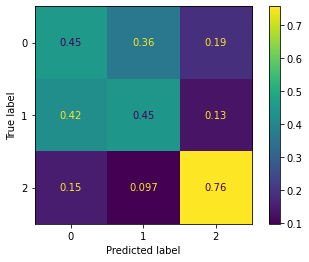

In [18]:
y_pred_test = xgb_clf.predict(X_test)
y_pred_train = xgb_clf.predict(X_train)
####### Train scores ########
print(f'accuracy score: {accuracy_score(y_train, y_pred_train)}')
print(f'f1 score: {f1_score(y_train, y_pred_train, average="micro")}')
print(f'precision score: {precision_score(y_train, y_pred_train, average="micro")}')
print(f'recall score:{recall_score(y_train, y_pred_train, average="micro")}\n')
####### Test scores #########
print(f'accuracy score: {accuracy_score(y_test, y_pred_test)}')
print(f'f1 score: {f1_score(y_test, y_pred_test, average="micro")}')
print(f'precision score: {precision_score(y_test, y_pred_test, average="micro")}')
print(f'recall score:{recall_score(y_test, y_pred_test, average="micro")}')
plot_confusion_matrix(xgb_clf, X_test, y_test, normalize='true')

# Применить регрессию CatBoostRegressor к датасету (датасет уже другой, для регрессии, естественно). Вывести номер итерации с значения метрик (MAE и MSE) для наилучшей итерации.

### Берем данные котировок компании Nestle с сайта https://finance.yahoo.com/quote/NSRGY/history берем данные с 2015 по 2020 год, эти данные поделим на обучающую и тестовую выборку, а потом попробуем взять данные за 2021 год и пропустить через модель

In [207]:
df = pd.read_csv('NSRGY.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-05,78.400002,78.419998,77.589996,77.660004,67.162384,1610800
2015-05-06,78.029999,78.220001,77.150002,77.589996,67.101837,847900
2015-05-07,77.760002,77.940002,77.110001,77.230003,66.790512,274100
2015-05-08,78.139999,78.519997,77.860001,78.029999,67.482368,430500
2015-05-11,77.500000,78.099998,77.410004,77.599998,67.110481,305900


In [209]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Изначально думал тренировать на сформированных экономичких показателях, на скользящей средней с разными окнами, но решил потом просто на исходных фичах

In [210]:
df['EMA_9'] = df['Close'].ewm(9,min_periods=0).mean().shift()
df['SMA_5'] = df['Close'].rolling(5,min_periods=0).mean().shift()
df['SMA_10'] = df['Close'].rolling(10,min_periods=0).mean().shift()
df['SMA_15'] = df['Close'].rolling(15,min_periods=0).mean().shift()
df['SMA_30'] = df['Close'].rolling(30,min_periods=0).mean().shift()

In [213]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30
Date,,,,,,,,,,,
2015-05-05,78.400002,78.419998,77.589996,77.660004,67.162384,1610800,NaN,NaN,NaN,NaN,NaN
2015-05-06,78.029999,78.220001,77.150002,77.589996,67.101837,847900,77.660004,77.660004,77.660004,77.660004,77.660004
2015-05-07,77.760002,77.940002,77.110001,77.230003,66.790512,274100,77.623158,77.625000,77.625000,77.625000,77.625000
2015-05-08,78.139999,78.519997,77.860001,78.029999,67.482368,430500,77.478082,77.493334,77.493334,77.493334,77.493334
2015-05-11,77.500000,78.099998,77.410004,77.599998,67.110481,305900,77.638570,77.627500,77.627500,77.627500,77.627500
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,113.120003,113.169998,111.000000,111.080002,108.212036,400800,114.380809,112.254001,113.820001,114.410667,115.383667
2020-12-01,111.589996,111.980003,111.430000,111.870003,108.981636,263000,114.050728,111.660001,113.259001,113.935334,115.164334
2020-12-02,111.629997,112.180000,111.550003,111.739998,108.854988,189900,113.832656,111.824001,112.931001,113.761334,114.991667


### Формируем тестовые данные и обучающие

In [221]:
train = df[:'2020-11-30']
test = df['2020-11':]

In [222]:
train.shape, test.shape

((1405, 11), (24, 11))

In [223]:
X_train = train[['Open','High','Low','Volume']]
y_train = train['Close']
X_test = test[['Open','High','Low','Volume']]
y_test = test['Close']

In [224]:
xgb_reg = XGBRegressor(objective='reg:squarederror', verbose=False)

In [225]:
xgb_reg.fit(X_test, y_test)

[18:22:50] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbose=False,
             verbosity=None)

In [252]:
year2021 = pd.read_csv('NSRGY_2021.csv', index_col='Date')
y_year2021 = year2021['Close']
X_year2021 = year2021[['Open','High','Low','Volume']]

### метрики качества 

In [253]:
y_pred_train = xgb_reg.predict(X_train)
y_pred_test = xgb_reg.predict(X_test)
y_pred_april = xgb_reg.predict(X_april)
y_pred_2021 = xgb_reg.predict(X_year2021)
print(f'MSE on test: {mean_squared_error(y_test, y_pred_test)}')
print(f'MAE on test: {median_absolute_error(y_test, y_pred_test)}')
print(f'MSE on 2021 data: {mean_squared_error(y_year2021, y_pred_2021)}')
print(f'MAE on 2021 data: {median_absolute_error(y_year2021, y_pred_2021)}')

MSE on test: 6.892224169840635e-07
MAE on test: 0.0005037770996096924
MSE on 2021 data: 4.17032998301924
MAE on 2021 data: 0.5312117167968751


### На тестовой выборке все как то слишком радостно

In [254]:
fig = make_subplots(1,1)
fig.add_scatter(x=df.index, y=df.Close, name='True')
fig.add_scatter(x=train.index, y=train.Close, name='Train')
fig.add_scatter(x=test.index, y=test.Close, name='Test')
fig.add_scatter(x=test.index, y=y_pred_test, name='Prediction on test')

### Решил добавить данные за 2021 год и тут видно что модель косячит, хотя основные тренды улавливает

In [256]:
fig = make_subplots(1,1)
fig.add_scatter(x=year2021.index, y=year2021.Close, name='True')
fig.add_scatter(x=year2021.index, y=y_pred_2021, name='Predict')